In [1]:
# Outlier Engineering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

boston = pd.DataFrame(boston.data,
                     columns=boston.feature_names)[['RM', 'LSTAT', 'CRIM']]
boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [6]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16,4))
    
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.ylabel('variable quantiles')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('boxplot')
    
    plt.show()

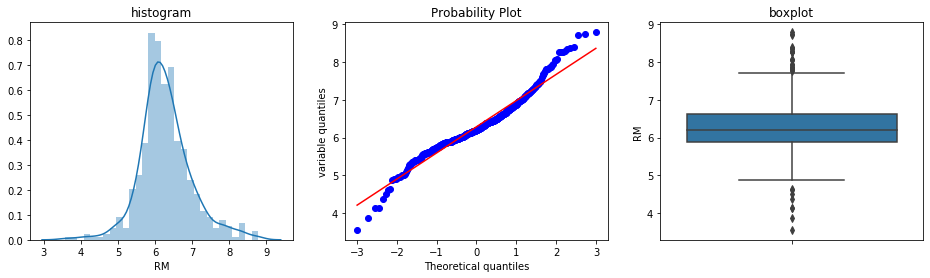

In [7]:
diagnostic_plots(boston, 'RM')

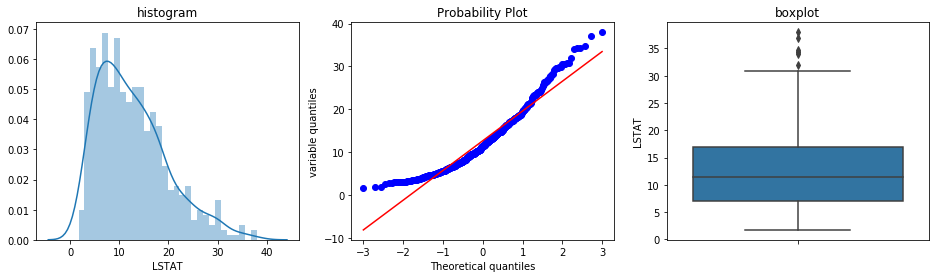

In [8]:
diagnostic_plots(boston, 'LSTAT')

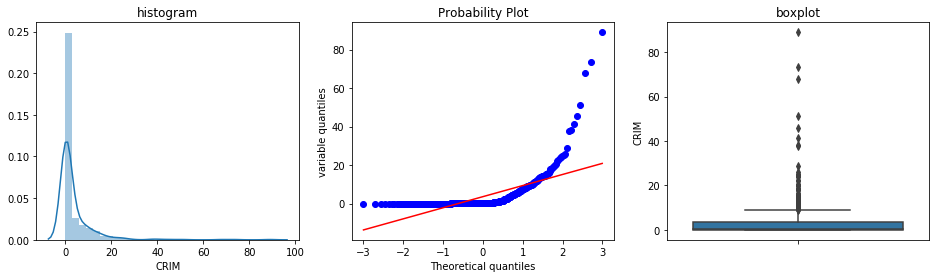

In [9]:
diagnostic_plots(boston, 'CRIM')

In [10]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    
    return upper_boundary, lower_boundary

In [12]:
RM_upper_limit, RM_lower_limit = find_skewed_boundaries(boston, 'RM', 1.5)
RM_upper_limit, RM_lower_limit

(7.730499999999999, 4.778500000000001)

In [15]:
LSTAT_upper_limit, LSTAT_lower_limit = find_skewed_boundaries(boston, 'LSTAT', 1.5)
LSTAT_upper_limit, LSTAT_lower_limit

(31.962500000000006, -8.057500000000005)

In [16]:
CRIM_upper_limit, CRIM_lower_limit = find_skewed_boundaries(boston, 'CRIM', 1.5)
CRIM_upper_limit, CRIM_lower_limit

(9.06963875, -5.31051125)

In [17]:
outliers_RM = np.where(boston['RM'] > RM_upper_limit, True,
                      np.where(boston['RM'] < RM_lower_limit, True, False))

In [18]:
outliers_LSTAT = np.where(boston['LSTAT'] > LSTAT_upper_limit, True,
                      np.where(boston['LSTAT'] < LSTAT_lower_limit, True, False))

In [19]:
outliers_CRIM = np.where(boston['CRIM'] > CRIM_upper_limit, True,
                      np.where(boston['CRIM'] < CRIM_lower_limit, True, False))

In [21]:
boston_trimmed = boston.loc[~(outliers_RM + outliers_LSTAT + outliers_CRIM), ]
boston.shape, boston_trimmed.shape

((506, 3), (416, 3))

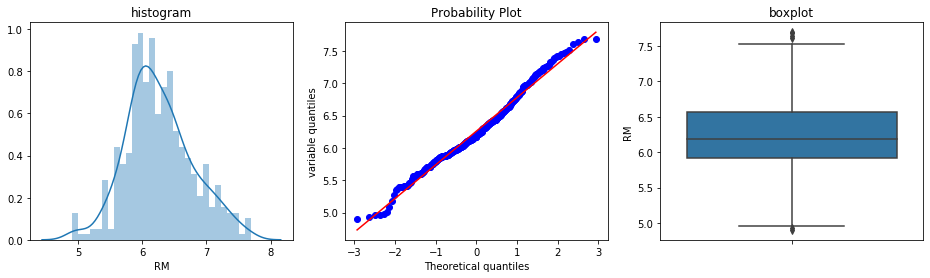

In [22]:
diagnostic_plots(boston_trimmed, 'RM')

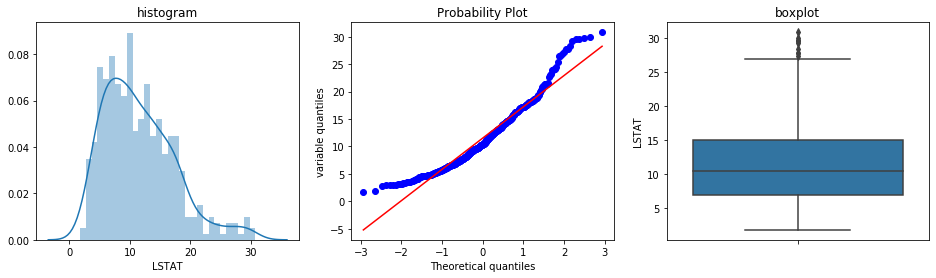

In [23]:
diagnostic_plots(boston_trimmed, 'LSTAT')

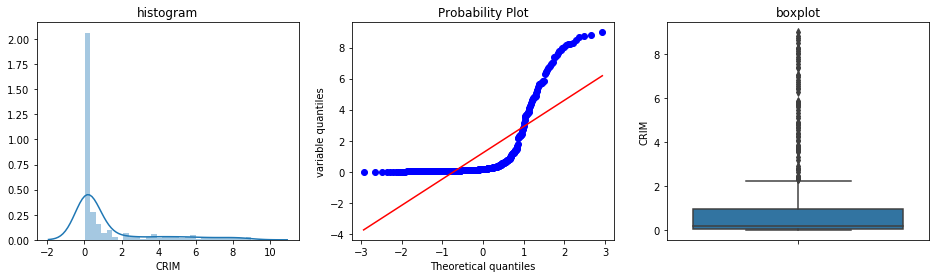

In [24]:
diagnostic_plots(boston_trimmed, 'CRIM')

In [26]:
# capping or censoring

boston['RM'] = np.where(boston['RM'] > RM_upper_limit, RM_upper_limit,
                       np.where(boston['RM'] < RM_lower_limit, RM_lower_limit, boston['RM']))

boston['LSTAT'] = np.where(boston['LSTAT'] > LSTAT_upper_limit, LSTAT_upper_limit,
                          np.where(boston['LSTAT'] < LSTAT_lower_limit, LSTAT_lower_limit,
                                  boston['LSTAT']))

boston['CRIM'] = np.where(boston['CRIM'] > CRIM_upper_limit, CRIM_upper_limit,
                         np.where(boston['CRIM'] < CRIM_lower_limit, CRIM_lower_limit,
                                 boston['CRIM']))

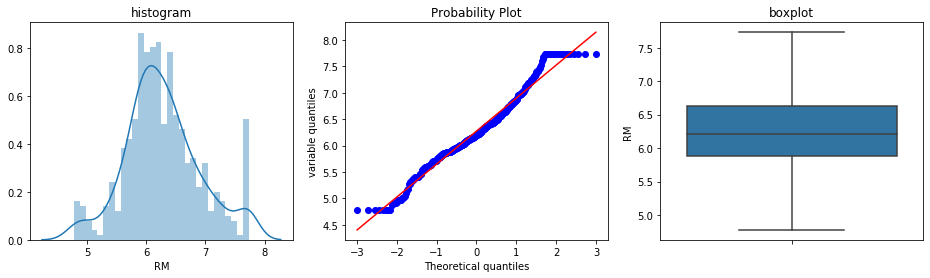

In [27]:
diagnostic_plots(boston, 'RM')

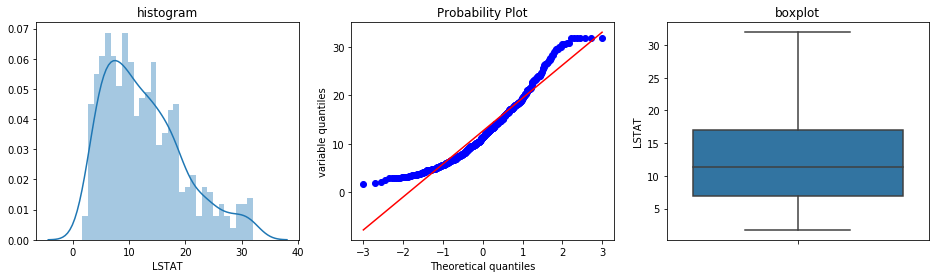

In [28]:
diagnostic_plots(boston, 'LSTAT')

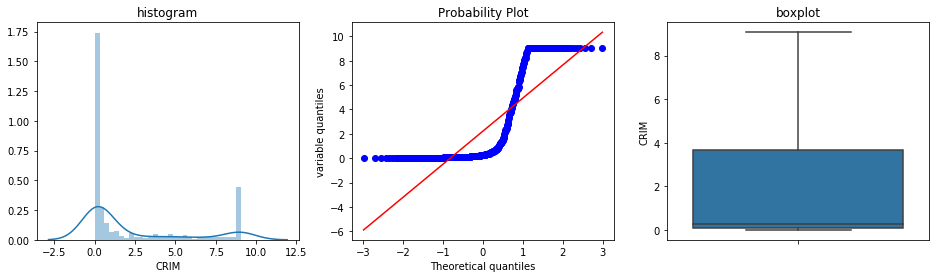

In [29]:
diagnostic_plots(boston, 'CRIM')